In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import requests 
import time 



import os
import csv
import matplotlib.pyplot as plt
import itertools as it
from matplotlib import cm
 
import seaborn as sns
import pandas as pd
plt.style.use('seaborn')

    # because you never know...  maybe I'll do things with this.


# Output File (CSV)
%cd "C:\Users\kwlei\Documents\GitHub\Web-Design-Challenge\WebVisualizations\assets"
## output_data_file = "resources/cities.csv"

# Import API key
from api_key import api_key 
from citipy import citipy 


  #  Range of latitudes and longitudes
  #  lat_range = (-58, 73)
  #  lng_range = (-180, 180)


# produce some output 
print("some output")

C:\Users\kwlei\Documents\GitHub\Web-Design-Challenge\WebVisualizations\assets


ModuleNotFoundError: No module named 'api_key'

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

### It would be better to select randomly within a grid pattern (ie bins 10 degrees NS by 15 EW). 
### That would result in greater over-sampling of cities in sparsely populated areas,
###   thus giving better spread on the coverage. 

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


#  utu /watch?v=AVF-HyplZqo @ T:s=300

cityGrab_df = pd.DataFrame(cities, columns=["NAME"])
cityGrab_df.to_csv('cityGrab.csv', index=False)




# Print the city count to confirm sufficient count
# len(cities) 
len(cities) 

NameError: name 'citipy' is not defined

In [2]:
# Starting URL for Weather Map API Call
api_key = "7bedea6925812000099cef9c945868ec"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "MaxTemp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind, 
                          "Country": city_country, 
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


NameError: name 'cities' is not defined

In [85]:
city_weather_df = pd.DataFrame(city_data)
city_weather_df.rename(columns = {'Wind Speed':'WindSpeed'},inplace=True)
city_weather_df['absLat'] = city_weather_df['Lat'].abs()
city_weather_df.to_csv('resources\CityWeather.csv', index=False)
city_weather_df.tail(8)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed,absLat
571,lahij,100,YE,1570678793,68,13.06,44.88,81.36,8.45,13.06
572,corrales,99,CO,1570678793,97,5.83,-72.84,44.69,3.56,5.83
573,deer lake,5,CA,1570678793,100,49.18,-57.43,35.60,3.36,49.18
574,borogontsy,95,RU,1570678793,80,62.67,131.17,29.01,4.45,62.67
575,xichang,100,CN,1570678794,94,27.88,102.25,51.01,3.96,27.88
576,popondetta,86,PG,1570678794,63,-8.77,148.24,78.87,5.38,8.77
577,ahuimanu,40,US,1570678794,69,21.44,-157.84,86.00,9.17,21.44
578,kapit,86,MY,1570678794,68,2.02,112.94,84.42,3.00,2.02


In [46]:
# /** NOTA BENE:  I used a bigger weather file: I ran the API above a few times then cut the dupes **/ 
# /** it was for asthetic reasons more than data-driven: I like the way the cloud of small dots looks. **/ 
#  /** obviously, it's the same thing, it would work either way.  **/
#  /** PLUS this way the data stays with the code. **/
%cd "C:\Users\kwlei\Documents\GitHub\Web-Design-Challenge" 

C:\Users\kwlei\Documents\GitHub\Web-Design-Challenge


In [87]:
# LOAD THE DATA FROM THE API OUTPUT FILE 

city_weather = "resources\cities.csv" 
city_weather_df = pd.read_csv(city_weather)
city_weather_df.rename(columns = {'Wind Speed':'WindSpeed'},inplace=True)
city_weather_df.tail()

,City,Cloudiness,Country,timestamp,Humidity,Lat,Lng,MaxTemp,WindSpeed,absLat
1750,zhuravka,0,UA,1570050978,63,48.23,37.37,54.53,6.38,48.23
1751,zigong,100,CN,1570047583,91,29.34,104.78,69.04,3.78,29.34
1752,ziro,6,IN,1570050763,96,27.54,93.82,53.40,2.42,27.54
1753,zurrieq,20,MT,1570051012,83,35.83,14.47,75.99,8.05,35.83
1754,zyryanka,100,RU,1570050714,86,65.73,150.89,26.63,15.84,65.73


In [28]:
city_weather_df.dtypes

City           object
Cloudiness      int64
Country        object
timestamp       int64
Humidity        int64
Lat           float64
Lng           float64
MaxTemp       float64
WindSpeed     float64
absLat        float64
dtype: object

In [105]:
%cd "C:\Users\kwlei\Documents\GitHub\Web-Design-Challenge\WebVisualizations\visualizations"

C:\Users\kwlei\Documents\GitHub\Web-Design-Challenge\WebVisualizations\visualizations


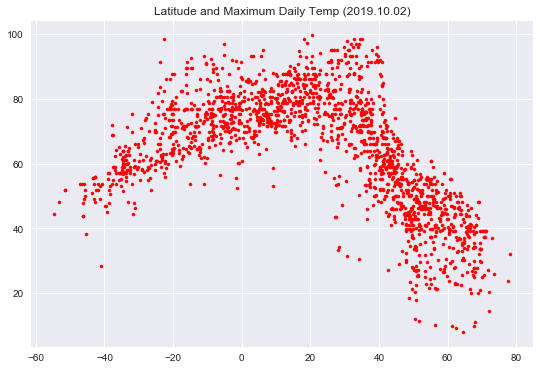

In [106]:
# MAKE THE PLOTS 
plt.figure(figsize=(9,6))
plt.title("Latitude and Maximum Daily Temp (2019.10.02)")
plt.scatter(city_weather_df.Lat, city_weather_df.MaxTemp, color= 'red', marker='o', s=10)
plt.savefig('Lat_X_Temp.png')

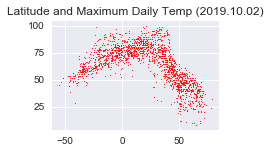

In [107]:
# MAKE THE PLOTS 
plt.figure(figsize=(3,2))
plt.title("Latitude and Maximum Daily Temp (2019.10.02)")
plt.scatter(city_weather_df.Lat, city_weather_df.MaxTemp, color= 'red', marker='o', s=0.5)
plt.savefig('sm_Lat_X_Temp.png')

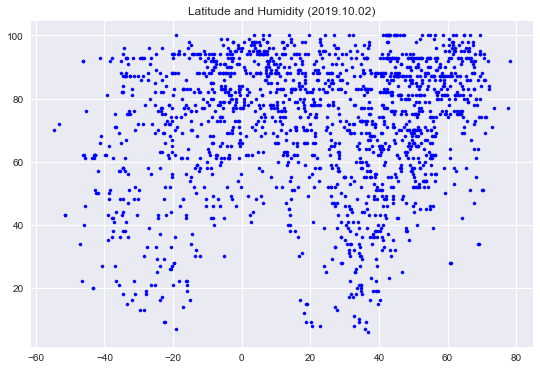

In [108]:
plt.figure(figsize=(9,6))
plt.scatter(city_weather_df.Lat, city_weather_df.Humidity, color= 'blue', marker='o', s=10)
plt.title("Latitude and Humidity (2019.10.02)")
plt.savefig('Lat_X_Humidity.png')

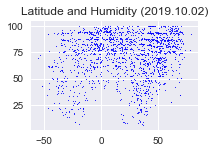

In [109]:
plt.figure(figsize=(3,2))
plt.scatter(city_weather_df.Lat, city_weather_df.Humidity, color= 'blue', s=0.5)
plt.title("Latitude and Humidity (2019.10.02)")
plt.savefig('sm_Lat_X_Humidity.png')

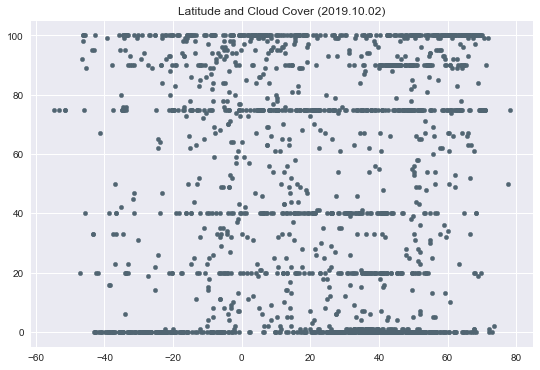

In [110]:
plt.figure(figsize=(9,6))
plt.scatter(city_weather_df.Lat, city_weather_df.Cloudiness, color = 'xkcd:slate', marker='o', s=20) 
plt.title("Latitude and Cloud Cover (2019.10.02)")
plt.savefig('Lat_X_Clouds.png')

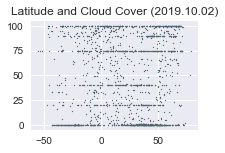

In [111]:
plt.figure(figsize=(3,2))
plt.scatter(city_weather_df.Lat, city_weather_df.Cloudiness, color = 'xkcd:slate', s=1) 
plt.title("Latitude and Cloud Cover (2019.10.02)")
plt.savefig('sm_Lat_X_Clouds.png')

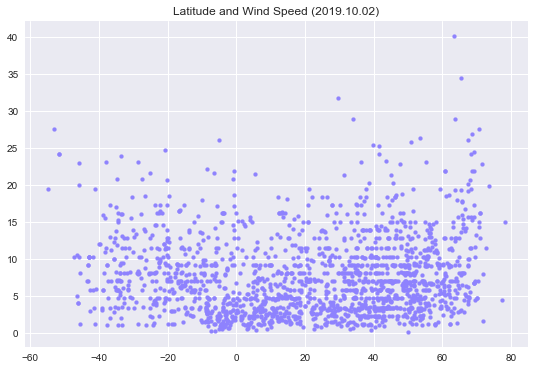

In [112]:
plt.figure(figsize=(9,6))
plt.scatter(city_weather_df.Lat, city_weather_df.WindSpeed, color= 'xkcd:periwinkle', marker='o', s=15)
plt.title("Latitude and Wind Speed (2019.10.02)")
plt.savefig('Lat_X_Wind.png')

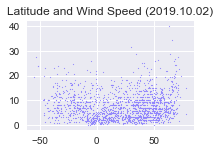

In [113]:
plt.figure(figsize=(3,2))
plt.scatter(city_weather_df.Lat, city_weather_df.WindSpeed, color= 'xkcd:periwinkle', s=0.75)
plt.title("Latitude and Wind Speed (2019.10.02)")
plt.savefig('sm_Lat_X_Wind.png')

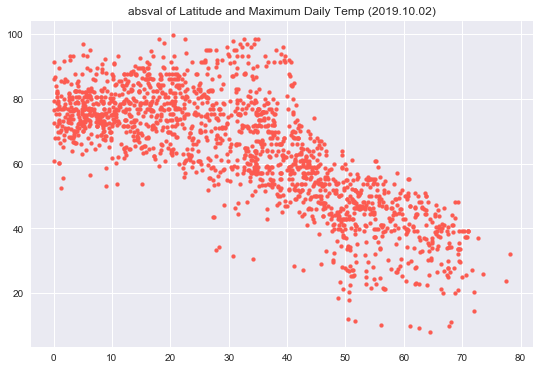

In [114]:
# MAKE THE SAME PLOTS USING ABSOLUTE LATITUDE
plt.figure(figsize=(9,6))
plt.scatter(city_weather_df.absLat, city_weather_df.MaxTemp, color= 'xkcd:coral', marker='o', s=15)
plt.title("absval of Latitude and Maximum Daily Temp (2019.10.02)")
plt.savefig('absLat_X_Temp.png')

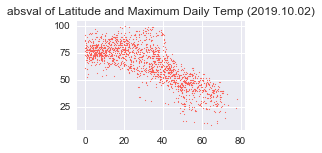

In [115]:
# MAKE THE SAME PLOTS USING ABSOLUTE LATITUDE
plt.figure(figsize=(3,2))
plt.scatter(city_weather_df.absLat, city_weather_df.MaxTemp, color= 'xkcd:coral', s=0.75)
plt.title("absval of Latitude and Maximum Daily Temp (2019.10.02)")
plt.savefig('sm_absLat_X_Temp.png')

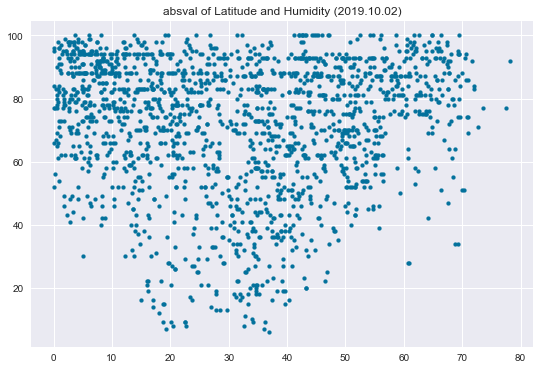

In [116]:
plt.figure(figsize=(9,6))
plt.scatter(city_weather_df.absLat, city_weather_df.Humidity, color= 'xkcd:ocean blue', marker='o', s=15)
plt.title("absval of Latitude and Humidity (2019.10.02)")
plt.savefig('absLat_X_Humidity.png')

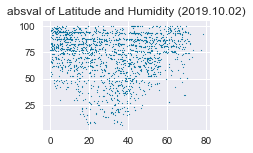

In [117]:
plt.figure(figsize=(3,2))
plt.scatter(city_weather_df.absLat, city_weather_df.Humidity, color= 'xkcd:ocean blue', s=0.75)
plt.title("absval of Latitude and Humidity (2019.10.02)")
plt.savefig('sm_absLat_X_Humidity.png')

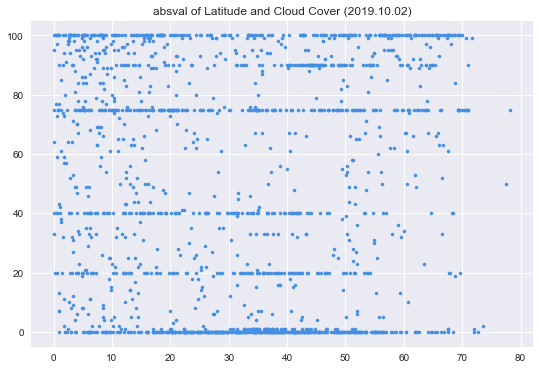

In [118]:
plt.figure(figsize=(9,6))
plt.scatter(city_weather_df.absLat, city_weather_df.Cloudiness, color = 'xkcd:dark sky blue', marker='o', s=10) 
plt.title("absval of Latitude and Cloud Cover (2019.10.02)")
plt.savefig('absLat_X_Clouds.png')

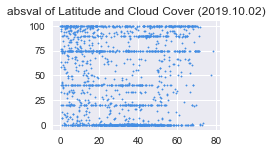

In [119]:
plt.figure(figsize=(3,2))
plt.scatter(city_weather_df.absLat, city_weather_df.Cloudiness, color = 'xkcd:dark sky blue', s=2) 
plt.title("absval of Latitude and Cloud Cover (2019.10.02)")
plt.savefig('sm_absLat_X_Clouds.png')

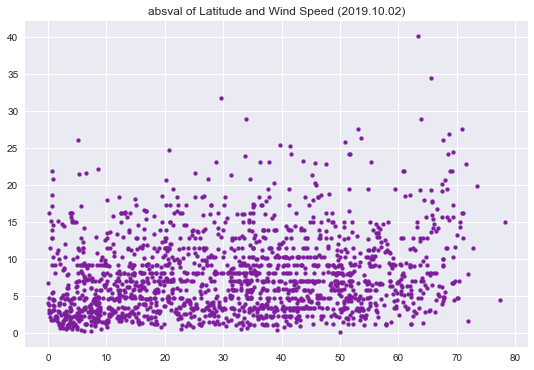

In [120]:
plt.figure(figsize=(9,6))
plt.scatter(city_weather_df.absLat, city_weather_df.WindSpeed, color= 'xkcd:purple', marker='o', s=15)
plt.title("absval of Latitude and Wind Speed (2019.10.02)")
plt.savefig('absLat_X_Wind.png')

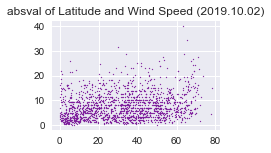

In [121]:
plt.figure(figsize=(3,2))
plt.scatter(city_weather_df.absLat, city_weather_df.WindSpeed, color= 'xkcd:purple', s=1)
plt.title("absval of Latitude and Wind Speed (2019.10.02)")
plt.savefig('sm_absLat_X_Wind.png')

In [126]:
city_weather_df.to_html('../resources/CityData.html')